In [1]:
#simplified attention mechanism
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

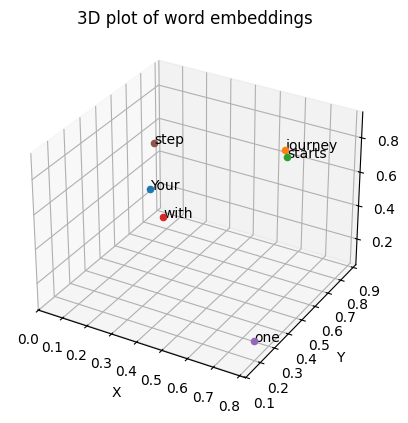

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
words=['Your','journey','starts','with','one','step']
x_coords= inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
for x,y,z ,word in zip(x_coords,y_coords,z_coords,words):
  ax.scatter(x,y,z)
  ax.text(x,y,z,word,fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D plot of word embeddings')
plt.show()

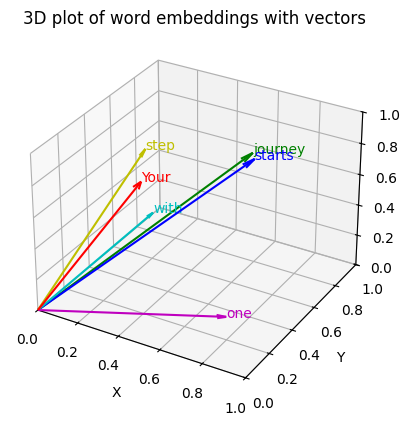

In [3]:
fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
colors=['r','g','b','c','m','y']
for (x,y,z,word,color) in zip(x_coords,y_coords,z_coords,words,colors):
  ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.05)
  ax.text(x,y,z,word,fontsize=10,color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])
plt.title('3D plot of word embeddings with vectors')
plt.show()

In [4]:
query = inputs[1]
attn_scores= torch.empty(inputs.shape[0])
for i,xi in enumerate(inputs):
  attn_scores[i]=torch.dot(query,xi)

print(attn_scores)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [5]:
attn_wt= attn_scores/attn_scores.sum()
print(attn_wt)
print(attn_wt.sum())

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)


In [6]:
def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum(dim=0)
attn_wt_softmax= softmax_naive(attn_scores)
print(attn_wt_softmax)
print(attn_wt_softmax.sum())

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


In [7]:
query= inputs[1]
context_vec= torch.zeros(query.shape)
for i,xi in enumerate(inputs):
  context_vec+=attn_wt_softmax[i]*xi
print(context_vec)

tensor([0.4419, 0.6515, 0.5683])


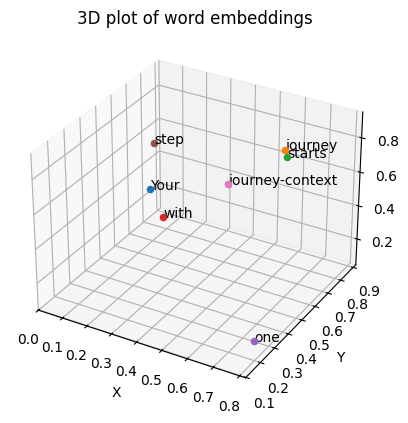

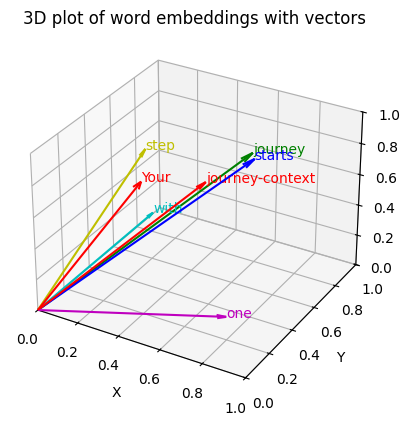

In [8]:
#simplified attention mechanism
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
  [0.4419, 0.6515, 0.5683]]
)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
words=['Your','journey','starts','with','one','step','journey-context']
x_coords= inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
for x,y,z ,word in zip(x_coords,y_coords,z_coords,words):
  ax.scatter(x,y,z)
  ax.text(x,y,z,word,fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D plot of word embeddings')
plt.show()
fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
colors=['r','g','b','c','m','y','r']
for (x,y,z,word,color) in zip(x_coords,y_coords,z_coords,words,colors):
  ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.05)
  ax.text(x,y,z,word,fontsize=10,color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])
plt.title('3D plot of word embeddings with vectors')
plt.show()

In [9]:
n = len(inputs)
attn_scores= torch.empty(n,n)
for i,xi in enumerate(inputs):
  for j,yi in enumerate(inputs):
    attn_scores[i,j]=torch.dot(xi,yi)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


In [10]:
attn_scores= inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


In [11]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.1792, 0.1713, 0.1692, 0.1061, 0.1042, 0.1240, 0.1459],
        [0.1180, 0.2026, 0.1986, 0.1056, 0.0921, 0.1346, 0.1486],
        [0.1184, 0.2017, 0.1981, 0.1058, 0.0943, 0.1332, 0.1485],
        [0.1223, 0.1768, 0.1744, 0.1246, 0.1077, 0.1467, 0.1476],
        [0.1305, 0.1675, 0.1689, 0.1169, 0.1607, 0.1108, 0.1446],
        [0.1180, 0.1861, 0.1813, 0.1211, 0.0842, 0.1615, 0.1478],
        [0.1277, 0.1889, 0.1860, 0.1121, 0.1011, 0.1359, 0.1483]])


In [12]:
all_context_vector= attn_weights @ inputs
print(all_context_vector)

tensor([[0.4420, 0.6016, 0.5774],
        [0.4419, 0.6515, 0.5683],
        [0.4429, 0.6499, 0.5673],
        [0.4321, 0.6330, 0.5536],
        [0.4635, 0.5997, 0.5326],
        [0.4213, 0.6505, 0.5651],
        [0.4397, 0.6372, 0.5635]])


In [13]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [14]:
d_in= inputs.shape[1]
d_out=2

In [15]:
print(d_in)

3


In [16]:
W_query= torch.nn.Parameter(torch.rand(d_in,d_out))
W_key= torch.nn.Parameter(torch.rand(d_in,d_out))
W_value= torch.nn.Parameter(torch.rand(d_in,d_out))

In [17]:
print(W_query)
print(W_key)
print(W_value)

Parameter containing:
tensor([[0.0049, 0.9518],
        [0.6296, 0.8782],
        [0.4067, 0.1223]], requires_grad=True)
Parameter containing:
tensor([[0.0038, 0.4164],
        [0.3673, 0.7951],
        [0.5419, 0.3188]], requires_grad=True)
Parameter containing:
tensor([[0.4573, 0.3106],
        [0.2922, 0.7268],
        [0.6661, 0.4783]], requires_grad=True)


In [18]:
keys= inputs @ W_key
values= inputs @ W_value
queries= inputs @ W_query

In [19]:
print(keys.shape)

torch.Size([6, 2])


In [20]:
attn_scores= queries @ keys.T # omega
print(attn_scores)

tensor([[0.6254, 1.0465, 1.0291, 0.6076, 0.4265, 0.8123],
        [1.2377, 2.1039, 2.0700, 1.2218, 0.8763, 1.6235],
        [1.2260, 2.0888, 2.0553, 1.2130, 0.8727, 1.6104],
        [0.7116, 1.1986, 1.1790, 0.6960, 0.4930, 0.9280],
        [0.6702, 1.2283, 1.2112, 0.7140, 0.5619, 0.9223],
        [0.8679, 1.4188, 1.3943, 0.8235, 0.5590, 1.1110]],
       grad_fn=<MmBackward0>)


In [21]:
d_k= keys.shape[-1]
attn_wt = torch.softmax(attn_scores/(d_k**0.5),dim=-1)
print(d_k)
print(attn_wt)

2
tensor([[0.1498, 0.2018, 0.1993, 0.1479, 0.1302, 0.1710],
        [0.1295, 0.2389, 0.2332, 0.1280, 0.1003, 0.1701],
        [0.1295, 0.2384, 0.2328, 0.1283, 0.1009, 0.1700],
        [0.1468, 0.2071, 0.2042, 0.1451, 0.1257, 0.1710],
        [0.1408, 0.2089, 0.2064, 0.1452, 0.1304, 0.1683],
        [0.1452, 0.2143, 0.2107, 0.1407, 0.1167, 0.1724]],
       grad_fn=<SoftmaxBackward0>)


In [22]:
context_vec= attn_wt @ values
print(context_vec)

tensor([[0.7450, 0.8492],
        [0.7699, 0.8868],
        [0.7695, 0.8863],
        [0.7486, 0.8547],
        [0.7479, 0.8550],
        [0.7543, 0.8629]], grad_fn=<MmBackward0>)


In [23]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.W_query=nn.Parameter(torch.rand(d_in,d_out))
    self.W_key=nn.Parameter(torch.rand(d_in,d_out))
    self.W_value=nn.Parameter(torch.rand(d_in,d_out))

  def forward(self,x):
    keys= x @ self.W_key
    queries= x @ self.W_query
    values= x @ self.W_value

    attn_scores= queries @ keys.T
    attn_weights= torch.softmax(attn_scores/keys.shape[1]**0.5,dim=-1)
    context_vec= attn_weights @ values
    return context_vec

In [24]:
SA = SelfAttention_v1(d_in,d_out)
print(SA(inputs))

tensor([[0.7533, 0.9522],
        [0.7982, 1.0019],
        [0.7974, 1.0010],
        [0.7681, 0.9687],
        [0.7614, 0.9612],
        [0.7787, 0.9805]], grad_fn=<MmBackward0>)


In [25]:
#causal attention

In [26]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [27]:
print(attn_wt)
print(attn_scores.shape[0])

tensor([[0.1498, 0.2018, 0.1993, 0.1479, 0.1302, 0.1710],
        [0.1295, 0.2389, 0.2332, 0.1280, 0.1003, 0.1701],
        [0.1295, 0.2384, 0.2328, 0.1283, 0.1009, 0.1700],
        [0.1468, 0.2071, 0.2042, 0.1451, 0.1257, 0.1710],
        [0.1408, 0.2089, 0.2064, 0.1452, 0.1304, 0.1683],
        [0.1452, 0.2143, 0.2107, 0.1407, 0.1167, 0.1724]],
       grad_fn=<SoftmaxBackward0>)
6


In [28]:
context_length= attn_scores.shape[0]
mask_simple= torch.tril(torch.ones(context_length,context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [29]:
masked_simple= attn_wt*mask_simple
print(masked_simple)

tensor([[0.1498, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1295, 0.2389, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1295, 0.2384, 0.2328, 0.0000, 0.0000, 0.0000],
        [0.1468, 0.2071, 0.2042, 0.1451, 0.0000, 0.0000],
        [0.1408, 0.2089, 0.2064, 0.1452, 0.1304, 0.0000],
        [0.1452, 0.2143, 0.2107, 0.1407, 0.1167, 0.1724]],
       grad_fn=<MulBackward0>)


In [30]:
row_sums= masked_simple.sum(dim=1,keepdim=True)
print(row_sums)
masked_simple_norm= masked_simple/row_sums
print(masked_simple_norm)

tensor([[0.1498],
        [0.3684],
        [0.6008],
        [0.7032],
        [0.8317],
        [1.0000]], grad_fn=<SumBackward1>)
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3515, 0.6485, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2156, 0.3968, 0.3875, 0.0000, 0.0000, 0.0000],
        [0.2087, 0.2945, 0.2904, 0.2064, 0.0000, 0.0000],
        [0.1693, 0.2512, 0.2482, 0.1746, 0.1568, 0.0000],
        [0.1452, 0.2143, 0.2107, 0.1407, 0.1167, 0.1724]],
       grad_fn=<DivBackward0>)


In [31]:
mask= torch.triu(torch.ones(context_length,context_length),diagonal=1)
print(mask)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])


In [32]:
print(attn_scores)
print(mask.bool())

tensor([[0.6254, 1.0465, 1.0291, 0.6076, 0.4265, 0.8123],
        [1.2377, 2.1039, 2.0700, 1.2218, 0.8763, 1.6235],
        [1.2260, 2.0888, 2.0553, 1.2130, 0.8727, 1.6104],
        [0.7116, 1.1986, 1.1790, 0.6960, 0.4930, 0.9280],
        [0.6702, 1.2283, 1.2112, 0.7140, 0.5619, 0.9223],
        [0.8679, 1.4188, 1.3943, 0.8235, 0.5590, 1.1110]],
       grad_fn=<MmBackward0>)
tensor([[False,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True],
        [False, False, False, False,  True,  True],
        [False, False, False, False, False,  True],
        [False, False, False, False, False, False]])


In [33]:
masked= attn_scores.masked_fill(mask.bool(),-torch.inf)
print(masked)

tensor([[0.6254,   -inf,   -inf,   -inf,   -inf,   -inf],
        [1.2377, 2.1039,   -inf,   -inf,   -inf,   -inf],
        [1.2260, 2.0888, 2.0553,   -inf,   -inf,   -inf],
        [0.7116, 1.1986, 1.1790, 0.6960,   -inf,   -inf],
        [0.6702, 1.2283, 1.2112, 0.7140, 0.5619,   -inf],
        [0.8679, 1.4188, 1.3943, 0.8235, 0.5590, 1.1110]],
       grad_fn=<MaskedFillBackward0>)


In [34]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3515, 0.6485, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2156, 0.3968, 0.3875, 0.0000, 0.0000, 0.0000],
        [0.2087, 0.2945, 0.2904, 0.2064, 0.0000, 0.0000],
        [0.1693, 0.2512, 0.2482, 0.1746, 0.1568, 0.0000],
        [0.1452, 0.2143, 0.2107, 0.1407, 0.1167, 0.1724]],
       grad_fn=<SoftmaxBackward0>)


In [35]:
class CausalAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,qkv_bias=False):
    super().__init__()
    self.d_out= d_out
    self.W_query= nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_key= nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_value= nn.Linear(d_in,d_out,bias=qkv_bias)
    self.dropout = nn.Dropout(dropout)
    self.register_buffer('mask',torch.triu(torch.ones(context_length,context_length),diagonal=1))

  def forward(self,x):
    b,num_tokens,d_in= x.shape
    keys= self.W_key(x)
    queries= self.W_query(x)
    values= self.W_value(x)
    attn_scores= queries @ keys.transpose(1,2)
    attn_scores.masked_fill(self.mask.bool()[:num_tokens,:num_tokens],-torch.inf)
    attn_weights= torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
    attn_weights= self.dropout(attn_weights)
    context_vec= attn_weights @ values
    return context_vec

In [36]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [37]:
context_length= batch.shape[1]
print(context_length)

6


In [38]:
ca= CausalAttention(3,2,context_length,0.0)
print(ca)

CausalAttention(
  (W_query): Linear(in_features=3, out_features=2, bias=False)
  (W_key): Linear(in_features=3, out_features=2, bias=False)
  (W_value): Linear(in_features=3, out_features=2, bias=False)
  (dropout): Dropout(p=0.0, inplace=False)
)


In [39]:
context_vec= ca(batch)
print(context_vec)

tensor([[[-0.5190, -0.1993],
         [-0.5134, -0.1962],
         [-0.5133, -0.1961],
         [-0.5145, -0.1969],
         [-0.5123, -0.1962],
         [-0.5154, -0.1971]],

        [[-0.5190, -0.1993],
         [-0.5134, -0.1962],
         [-0.5133, -0.1961],
         [-0.5145, -0.1969],
         [-0.5123, -0.1962],
         [-0.5154, -0.1971]]], grad_fn=<UnsafeViewBackward0>)


In [40]:
#multi head attention
class MultiHeadAttentionWrapper(nn.Module):
  def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
    super().__init__()
    self.heads= nn.ModuleList(
      [CausalAttention(d_in,d_out,context_length,dropout,qkv_bias)
      for _ in range(num_heads)]
    )

  def forward(self,x):
    return torch.cat([head(x) for head in self.heads],dim=-1)

In [41]:
mha= MultiHeadAttentionWrapper(3,2,context_length,0.0,2)
context_vec= mha(batch)
print(context_vec.shape)
print(context_vec)

torch.Size([2, 6, 4])
tensor([[[ 0.2258,  0.1324,  0.0087, -0.0243],
         [ 0.2222,  0.1406,  0.0080, -0.0253],
         [ 0.2223,  0.1403,  0.0079, -0.0254],
         [ 0.2228,  0.1355,  0.0068, -0.0272],
         [ 0.2248,  0.1320,  0.0070, -0.0283],
         [ 0.2218,  0.1384,  0.0070, -0.0260]],

        [[ 0.2258,  0.1324,  0.0087, -0.0243],
         [ 0.2222,  0.1406,  0.0080, -0.0253],
         [ 0.2223,  0.1403,  0.0079, -0.0254],
         [ 0.2228,  0.1355,  0.0068, -0.0272],
         [ 0.2248,  0.1320,  0.0070, -0.0283],
         [ 0.2218,  0.1384,  0.0070, -0.0260]]], grad_fn=<CatBackward0>)


In [41]:
class MultiHeadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
    super().__init__()
    assert(d_out%num_head==0),

In [56]:
class MultiHeadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
    super().__init__()
    assert(d_out%num_heads==0),\
    "d_out must be divisible by num_heads"
    self.d_out= d_out
    self.num_heads= num_heads
    self.head_dim= d_out//num_heads
    self.W_query= nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_key= nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_value= nn.Linear(d_in,d_out,bias=qkv_bias)
    self.out_proj=nn.Linear(d_out,d_out) #linear layer to combine head outputs
    self.dropout= nn.Dropout(dropout)
    self.register_buffer("mask",torch.triu(torch.ones(context_length,context_length),diagonal=1))

  def forward(self,x):
    b,num_tokens,d_in= x.shape
    keys= self.W_key(x) # (b,num_tokens,d_out)
    queries= self.W_query(x)
    values= self.W_value(x)
    # we implicitly split matrix by adding num_heads dim
    keys= keys.view(b,num_tokens,self.num_heads,self.head_dim)
    queries= queries.view(b,num_tokens,self.num_heads,self.head_dim)
    values= values.view(b,num_tokens,self.num_heads,self.head_dim)
    #transpose (b,num_tokens,num_heads,head_dim)->(b,num_heads,num_tokens,head_dim)
    #This dimension helps in parallel computation
    keys= keys.transpose(1,2)
    queries=queries.transpose(1,2)
    values= values.transpose(1,2)
    attn_scores= queries @ keys.transpose(2,3) #(b,num_heads,num_tokens,num_tokens)
    mask_bool= self.mask.bool()[:num_tokens,:num_tokens]
    attn_scores.masked_fill_(mask_bool,-torch.inf)
    attn_weights= torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
    attn_weights= self.dropout(attn_weights)
    #context vec before tanspose (b,num_heads,num_token,head_dim)
    #after transpose (b,num_tokens,num_heads,head_dim)
    #merging the heads back
    context_vec= (attn_weights @ values).transpose(1,2)
    context_vec= context_vec.contiguous().view(b,num_tokens,self.d_out)
    context_vec= self.out_proj(context_vec)
    return context_vec


In [57]:
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)
batch_size,context_length,d_in= batch.shape

torch.Size([2, 3, 6])


In [58]:
mha= MultiHeadAttention(d_in,6,context_length,0.0,num_heads=2)
context_vecs= mha(batch)
print(context_vecs)

tensor([[[-0.3096, -0.0420,  0.1884, -0.2143, -0.1586,  0.0323],
         [-0.2653, -0.0357,  0.1734, -0.2423, -0.2406,  0.0341],
         [-0.2229, -0.0063,  0.2783, -0.2606, -0.1490, -0.0139]],

        [[-0.3096, -0.0420,  0.1884, -0.2143, -0.1586,  0.0323],
         [-0.2653, -0.0357,  0.1734, -0.2423, -0.2406,  0.0341],
         [-0.2229, -0.0063,  0.2783, -0.2606, -0.1490, -0.0139]]],
       grad_fn=<ViewBackward0>)
